# Packages to be used

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import glob
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths

In [4]:
figs_path  = '../../../Codes/Model/Results/'
probs_path = '../../../LargeFilesResults/Model/'

# Files to be used in the analysis

In [16]:
all_files = os.listdir(path=probs_path)
all_files.sort()
all_files

['25betas_rmshared.pdf',
 '25betas_rmshared.png',
 '25betas_rstan.pdf',
 '25betas_rstan.png',
 '25betas_shprior.pdf',
 '25betas_shprior.png',
 'betas_allZ_sharedprior.csv',
 'betas_allZ_sharedprior_sc.csv',
 'betas_comparison_rmsh.gif',
 'betas_comparison_shared.gif',
 'betas_rm_sharedprior.csv',
 'betas_rstan.csv',
 'betas_rstan_full.csv',
 'betas_rstan_full2.csv',
 'betas_rstan_sum.csv',
 'betas_sharedprior.csv',
 'divergences.png',
 'divergences_teste.png',
 'entirefit_allZ_sharedpriors_sc.csv',
 'entirefit_rm_sharedpriors.csv',
 'entirefit_sharedpriors.csv',
 'fit_summary_allZ_sharedprior.csv',
 'fit_summary_allZ_sharedprior_sc.csv',
 'fit_summary_rm_sharedprior.csv',
 'fit_summary_sharedprior.csv',
 'prob01_rmshared_stats.csv',
 'prob01_stats.csv',
 'prob01_stats_allZ_sc.csv',
 'prob02_rmshared_stats.csv',
 'prob02_stats.csv',
 'prob02_stats_allZ_sc.csv',
 'prob03_rmshared_stats.csv',
 'prob03_stats.csv',
 'prob03_stats_allZ_sc.csv',
 'prob04_rmshared_stats.csv',
 'prob04_stats.cs

In [17]:
print (len('prob03_stats_allZ_sc.csv'))

24


In [6]:
probs_files = []
for i in range(len(all_files)):
    prefix = all_files[i].split('.')[0]
    if prefix[:5] == 'prob0' and len(all_files[i])==16:
        probs_files.append(all_files[i])
    else:
        continue
probs_files = np.array(probs_files)
probs_files

array(['prob03_stats.csv', 'prob01_stats.csv', 'prob04_stats.csv',
       'prob02_stats.csv', 'prob05_stats.csv'], dtype='<U16')

# Plots

In [ ]:
%matplotlib notebook

In [ ]:
# stellar_mass_ini = float(input("Minimum mass?"))

In [ ]:
# stellar_mass_fin = float(input("Maximum mass?"))

In [7]:
figsize      = (20, 5)
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
# palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']
palette      = ['grey', '#a6611a','#dfc27d','#80cdc1','#018571']
alpha        = 0.4
fontsize = 15
xlim = [0.05, .36]
ylim = [0, 1.]

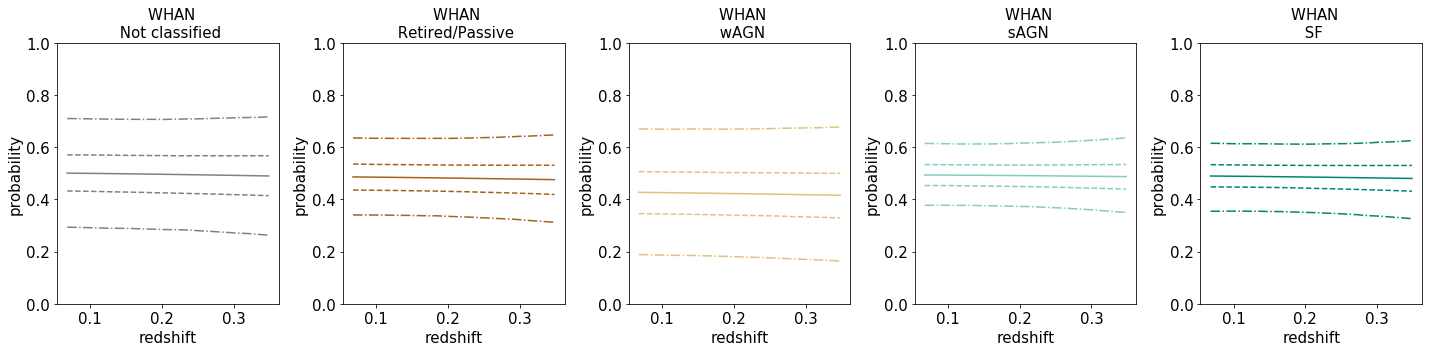

In [8]:
rows     = 1
cols     = probs_files.size
position = 0
plt.subplots(figsize=figsize)
for i in range(cols):
    prob_temp      = pd.read_csv(os.path.join(probs_path, probs_files[i]))
#     data_slice_idx = np.where((prob_temp['LOG_STELLAR_MASS'].values>=stellar_mass_ini)*
#                               (prob_temp['LOG_STELLAR_MASS'].values<=stellar_mass_fin))
    data_slice_idx = np.where(prob_temp['LOG_STELLAR_MASS'].values==11.)
    redshift = prob_temp['Z'].values[data_slice_idx]
    mean     = prob_temp['mean'].values[data_slice_idx]
    perc025  = prob_temp['2.5%'].values[data_slice_idx]
    perc250  = prob_temp['25%'].values[data_slice_idx]
    perc500  = prob_temp['50%'].values[data_slice_idx]
    perc750  = prob_temp['75%'].values[data_slice_idx]
    perc975  = prob_temp['97.5%'].values[data_slice_idx]
    position+=1
    plot = plt.subplot(rows, cols, position)
    plt.plot(redshift, mean, '-', color=palette[i])
    plt.plot(redshift, perc025, '-.', color=palette[i])
    plt.plot(redshift, perc250, '--', color= palette[i])
    plt.plot(redshift, perc750, '--', color=palette[i])
    plt.plot(redshift, perc975, '-.', color=palette[i])
    plt.title("$\,$ WHAN \n %s" % whan_classes[i], fontsize=fontsize)
    plt.xlabel("redshift", fontsize=fontsize)
    plt.ylabel("probability", fontsize=fontsize)
    plt.tick_params('both', labelsize=fontsize)
    plt.ylim(ylim)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'probs_temp.png'))
plt.show()

In [9]:
prob_temp

,Unnamed: 0,probs,median,mean,std,2.5%,25%,50%,75%,97.5%,Z,LOG_STELLAR_MASS
0,0,0,0.368950,0.371132,0.109362,0.170740,0.291897,0.368950,0.449708,0.588303,0.067940,9.0
1,1,1,0.368762,0.370922,0.109426,0.170075,0.291562,0.368762,0.449569,0.588372,0.077608,9.0
2,2,2,0.368503,0.370710,0.109501,0.170215,0.291114,0.368503,0.449256,0.588479,0.087275,9.0
3,3,3,0.367973,0.370494,0.109587,0.169897,0.290662,0.367973,0.449126,0.587628,0.096943,9.0
4,4,4,0.367607,0.370274,0.109685,0.169098,0.290298,0.367607,0.448604,0.587427,0.106610,9.0
5,5,5,0.367637,0.370052,0.109795,0.168756,0.290039,0.367637,0.448533,0.586891,0.116278,9.0
6,6,6,0.367261,0.369826,0.109917,0.168565,0.289748,0.367261,0.448306,0.586586,0.125946,9.0
7,7,7,0.367133,0.369598,0.110051,0.168173,0.289211,0.367133,0.448361,0.586475,0.135613,9.0
8,8,8,0.366854,0.369366,0.110198,0.167894,0.288830,0.366854,0.448279,0.586207,0.145281,9.0
9,9,9,0.366634,0.369131,0.110358,0.167331,0.288575,0.366634,0.448051,0.586537,0.154948,9.0


In [ ]:
summary = pd.read_csv('../../LargeFilesResults/Model/fit_summary_sharedprior.csv')

In [ ]:
summary

In [ ]:
rows     = 1
cols     = probs_files.size
position = 0
plt.subplots(figsize=figsize)
for i in range(cols):
    prob_temp      = pd.read_csv(os.path.join(probs_path, probs_files[i]))
#     data_slice_idx = np.where((prob_temp['LOG_STELLAR_MASS'].values>=stellar_mass_ini)*
#                               (prob_temp['LOG_STELLAR_MASS'].values<=stellar_mass_fin))
    data_slice_idx = np.where(prob_temp['Z'].values==prob_temp['Z'].values[10])
    redshift = prob_temp['Z'].values[data_slice_idx]
    mass     = prob_temp['LOG_STELLAR_MASS'].values[data_slice_idx]
    mean     = prob_temp['mean'].values[data_slice_idx]
    perc025  = prob_temp['2.5%'].values[data_slice_idx]
    perc250  = prob_temp['25%'].values[data_slice_idx]
    perc500  = prob_temp['50%'].values[data_slice_idx]
    perc750  = prob_temp['75%'].values[data_slice_idx]
    perc975  = prob_temp['97.5%'].values[data_slice_idx]
    position+=1
    plot = plt.subplot(rows, cols, position)
    plt.plot(mass, mean, '-', color=palette[i])
    plt.plot(mass, perc025, '-.', color=palette[i])
    plt.plot(mass, perc250, '--', color= palette[i])
    plt.plot(mass, perc750, '--', color=palette[i])
    plt.plot(mass, perc975, '-.', color=palette[i])
    plt.title("$\,$ WHAN \n %s" % whan_classes[i], fontsize=fontsize)
    plt.xlabel("mass", fontsize=fontsize)
    plt.ylabel("probability", fontsize=fontsize)
    plt.tick_params('both', labelsize=fontsize)
    plt.ylim(ylim)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'probs_temp_mass.png'))
plt.show()

In [ ]:
np.unique(prob_temp['Z'].values)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['mean'], color='#a6611a', alpha=0.8, linewidth=0, antialiased=False)
ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['25%'], color='#a6611a', alpha=0.6, linewidth=0, antialiased=False)
ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['75%'], color='#a6611a', alpha=0.6, linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
# ax.zaxis.set_rotate_label(False)
# plt.savefig('./../../Figs/logit3D_grid.pdf', dpi=100)

# for ii in xrange(180,360,10):
#     ax.view_init(elev=10., azim=ii)
#     plt.savefig("./Results/movie_short/movie_0%d_0.png" % ii)
    
plt.savefig(os.path.join(figs_path, '3d_sharedprior.png'))

plt.show()

In [ ]:
nobs = 100
x1 = np.linspace(0, 1, nobs)
y1 = np.linspace(-1, 1, nobs)
x2, y2 = np.meshgrid(x1, y1)
x2 = x2.reshape((nobs**2), )
y2 = y2.reshape((nobs**2), )

z = 2*np.array(x2) + np.array(y2)**2 + 0.5*np.array(y2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\n x", fontsize=14)
ax.set_ylabel("\n y", fontsize=14)
ax.set_zlabel("\n z", fontsize=14)
ax.plot_trisurf(x2, y2, z, color='#a6611a', alpha=0.8, linewidth=0, antialiased=False)

plt.show()